## 4. A Logistic Regression Model

After all the basic tutorials, we can combine them into some real-life cases. Here we fit a Logistic Regression Model with `boomdiff` and breast_cancer data from `sklearn` 

#### 0. Problem description

The breast cancer dataset is a classic and very easy binary classification dataset. It record 569 records of breast cancer wisconsin dataset for a classification task. Each record $k$ has 30 features $X^k \in \mathbb{R}^{30}$ and a binary label $y^k$ (0 or 1) denoting its classification results. We want to find a set of weights $\beta$ and a bias $b$ minimize the logistic cross entropy:

$$\hat{y}^k = \text{logistic}(b+\beta_0X_0^k + \beta_1X_1^k + \dots + \beta_{29}X_{29}^k)$$

$$\text{arg min}_{\beta,b}[- \frac{1}{N}\sum_{k=1}^N(y^k\log(\hat{y}^k) + (1-y^k)\log (1- \hat{y}^k))]$$

#### 1. Import necessary packages

In [13]:
import numpy as np

from boomdiff import AD, optimize, loss_function

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

#### 2. Load the data and separate into training and test subsets

In [14]:
# Load data
data = load_breast_cancer()
feature_names = data.feature_names
X = PolynomialFeatures(degree=1).fit_transform(data.data) #add a bias column, 1
y = data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

#### 3. Initialize some random parameters as beta, b

In [15]:
beta = AD.from_array(np.random.normal(0,0.001,size=30), 'beta')
b = AD(np.random.normal(0,0.001),'b')

In [16]:
parameter_array = np.concatenate((np.array([b]),beta)) # make sure this is 1D and bias is the first one

#### 4. Construct the logistic loss function 

Use the `loss_functions.logistic_cross_entropy` to construct the target

In [17]:
loss = lambda: loss_function.logistic_cross_entropy(X_train, y_train, parameter_array)

In [18]:
loss()

1.396630306669183 ({'b': 0.22457159971283772, 'beta_0': 4.790880821308257, 'beta_1': 5.297628910132331, 'beta_2': 31.930046842251382, 'beta_3': 304.841468147546, 'beta_4': 0.02445999982636302, 'beta_5': 0.041200041545070586, 'beta_6': 0.05195220437092909, 'beta_7': 0.02884474594932971, 'beta_8': 0.045602967759059046, 'beta_9': 0.013790922865592876, 'beta_10': 0.19124505779449508, 'beta_11': 0.26191807639062364, 'beta_12': 1.3560037217261456, 'beta_13': 25.339375988050648, 'beta_14': 0.0014130327726420064, 'beta_15': 0.008572359122429565, 'beta_16': 0.011439915253043942, 'beta_17': 0.0040968560137147085, 'beta_18': 0.004492202315916427, 'beta_19': 0.0009226700133781475, 'beta_20': 6.00885367149095, 'beta_21': 7.294568639075341, 'beta_22': 40.49750747348723, 'beta_23': 462.7861789448487, 'beta_24': 0.034999898817310075, 'beta_25': 0.1085775264029602, 'beta_26': 0.13894144536109818, 'beta_27': 0.05647159753175113, 'beta_28': 0.07915790573439692, 'beta_29': 0.02168897077156025})

#### 5. Initialize an optimizer

In [19]:
opt = optimize.Adam(learning_rate=0.001)

#### 6. Update with the optimizer, with batched dataset

In [20]:
opt.minimize(loss, parameter_array, steps=500, record=True)

#### 7. Show the result 

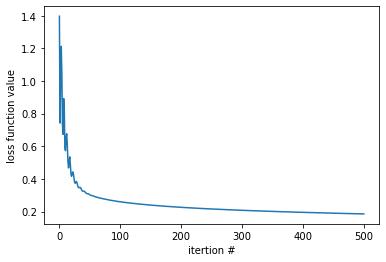

In [21]:
opt.plot_loss_func()

In [22]:
print("Feature Names:")
print("bias", feature_names)
print("=====================================")
print("Corresponding optimized weights:")
print(AD.to_array(parameter_array))

Feature Names:
bias ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Corresponding optimized weights:
[ 0.10475909  0.06201469  0.02845467  0.05667187  0.01075179  0.05569706
 -0.13187465 -0.22448027 -0.18295032  0.06297985  0.07990187  0.02779673
  0.06679525  0.00494098 -0.02709579  0.0601084  -0.10889737 -0.10640908
 -0.03764373  0.05676156  0.00841639  0.0440674   0.00520626  0.02966488
 -0.02007225  0.02799997 -0.20383798 -0.22975684 -0.16815785  0.01641653
  0.00422875]


#### 8. Evaluate the optimized results

In [23]:
print("Training Set Accuracy:")
print(np.sum(AD.to_array(AD.logistic(X_train@parameter_array)).round(0) == y_train)/X_train.shape[0])

Training Set Accuracy:
0.9318681318681319


In [24]:
print("Test Set Accuracy:")
print(np.sum(AD.to_array(AD.logistic(X_test@parameter_array)).round(0) == y_test)/X_test.shape[0])

Test Set Accuracy:
0.9035087719298246


#### 9. Comparison to sklearn

In [47]:
logreg = LogisticRegression(fit_intercept=False, penalty='none', solver='newton-cg', max_iter=1000).fit(X_train, y_train)
print('sklearn estimates')
print('=================')
print(f'{logreg.coef_[0]}')
print('\n')
print('boomdiff estimates')
print('==================')
print(AD.to_array(parameter_array))

sklearn estimates
[ 2.68109239e+02  6.50611542e+01 -8.51714460e-01  3.64517424e-01
 -1.22693542e-01 -1.91183595e+02 -1.67348686e+02 -5.53922485e+02
 -5.36549682e+02  1.55292228e+02  5.30616820e+00  4.16427971e+02
  2.14974519e+01 -3.13830185e+00 -3.45006368e+00 -1.56422562e+02
  6.90943725e+01  2.65894954e+00 -6.74690330e+01 -8.32258275e+01
  4.64559892e+01 -5.99542606e+01 -4.19453008e+00  1.92443242e+00
 -1.27298094e-01 -6.69879622e+02  2.55343674e+02 -1.40607967e+01
 -3.20169110e+02 -2.30364768e+02  2.01386288e+01]


boomdiff estimates
[ 0.10475909  0.06201469  0.02845467  0.05667187  0.01075179  0.05569706
 -0.13187465 -0.22448027 -0.18295032  0.06297985  0.07990187  0.02779673
  0.06679525  0.00494098 -0.02709579  0.0601084  -0.10889737 -0.10640908
 -0.03764373  0.05676156  0.00841639  0.0440674   0.00520626  0.02966488
 -0.02007225  0.02799997 -0.20383798 -0.22975684 -0.16815785  0.01641653
  0.00422875]
